# LAVA Data Value
## For Mislabeled Data Detection (STL10)

In [1]:
import lava

In [2]:
import torch
import torchvision
# print(torch.__version__)
# print(torchvision.__version__)
# print(torch.version.cuda)
# print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.autograd import Variable

import matplotlib.pyplot as plt
from torch import tensor
from torchvision import datasets, transforms
import pandas as pd
import numpy as n

from torch.utils.data import Dataset, TensorDataset, DataLoader

In [ ]:
! nvidia-smi

In [ ]:
cuda_num = 0
import torchvision
print(torchvision.__version__)
import torch
print(torch.__version__)
import os
os.environ["CUDA_VISIBLE_DEVICES"]=str(cuda_num)
print(os.environ["CUDA_VISIBLE_DEVICES"])
torch.cuda.set_device(cuda_num)
print("Cuda device: ", torch.cuda.current_device())
print("cude devices: ", torch.cuda.device_count())
device = torch.device('cuda:' + str(cuda_num) if torch.cuda.is_available() else 'cpu')

### Set Parameters

In [5]:
training_size = 5000
valid_size = 2000
resize = 32
portion = 0.3

### Loading Corrupted Data into DataLoaders
### Train and Test Loaders with Indices of Corrupted Data

In [6]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='STL10', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

seeed
Files already downloaded and verified
Files already downloaded and verified
Train Type:  <class 'torchvision.datasets.stl10.STL10'>  Train:  Dataset STL10
    Number of datapoints: 5000
    Root location: /home/just/Programming/otdd-main/data
    Split: train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
Teest Type:  <class 'torchvision.datasets.stl10.STL10'>  Train:  Dataset STL10
    Number of datapoints: 8000
    Root location: /home/just/Programming/otdd-main/data
    Split: test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
FOLD IDSSS:  [   0    1    2 ... 4997 4998 49

### Load Feature Extractor for a Given Dataset
### Checkpoints provided and training files provided

In [7]:
feature_extractor = lava.load_pretrained_feature_extractor('preresnet18_test_stl10.pth', device)

### Compute Dual Solution of Optimal Transport Problem

In [8]:
dual_sol, trained_with_flag = lava.compute_dual(feature_extractor, loaders['train'], loaders['test'], 
                                                training_size, shuffle_ind, resize=resize)

WROGNG: unexpected line 659


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Finished first label distance in: 26.34044051170349 s.
load datasets again?
finisehd load datasets in 0.7925167083740234s.
Calculate the same thing again...
This took 0.005351066589355469 s.
before Loss
x:  tensor([[[1332.5459, 3423.4160,  490.6534,  ..., 1607.5631, 2216.5532,
          1078.6294],
         [2925.5969, 3242.3452,  991.0903,  ..., 1027.2827, 3962.2500,
          2039.5393],
         [1888.4187, 3969.7878,  406.4285,  ..., 1373.5833, 3360.2104,
          1685.6584],
         ...,
         [2476.4060, 3421.6416, 1880.0450,  ..., 3688.2124, 2613.2915,
          1599.5713],
         [1480.9888, 3007.9954, 1007.4749,  ..., 2048.5557, 2138.5688,
          1008.3782],
         [2817.9932, 3489.5110, 1094.2736,  ...,  794.5531, 3329.8154,
          1659.2576]]], device='cuda:0')
x shape:  torch.Size([1, 5000, 2000])
y:  tensor([[[ 558.8251, 1381.0925,  467.7468,  ..., 1158.1200, 2032.8157,
          2032.8157],
         [2104.1140, 1897.9562, 2559.4919,  ..., 3450.8323, 1225.18

### Compute the Data Values from Calibrated Gradient
### Visualize Detection Rate Based on LAVA

inspected: 10, found: 10 detection rate: 0.01 baseline: 1.8
inspected: 20, found: 20 detection rate: 0.01 baseline: 3.6
inspected: 30, found: 29 detection rate: 0.02 baseline: 5.4
inspected: 40, found: 39 detection rate: 0.03 baseline: 7.2
inspected: 50, found: 49 detection rate: 0.03 baseline: 9.0
inspected: 60, found: 59 detection rate: 0.04 baseline: 10.8
inspected: 70, found: 69 detection rate: 0.05 baseline: 12.6
inspected: 80, found: 79 detection rate: 0.05 baseline: 14.4
inspected: 90, found: 89 detection rate: 0.06 baseline: 16.2
inspected: 100, found: 99 detection rate: 0.07 baseline: 18.0
inspected: 110, found: 109 detection rate: 0.07 baseline: 19.8
inspected: 120, found: 119 detection rate: 0.08 baseline: 21.6
inspected: 130, found: 129 detection rate: 0.09 baseline: 23.400000000000002
inspected: 140, found: 139 detection rate: 0.09 baseline: 25.2
inspected: 150, found: 149 detection rate: 0.10 baseline: 27.0
inspected: 160, found: 159 detection rate: 0.11 baseline: 28.8
in

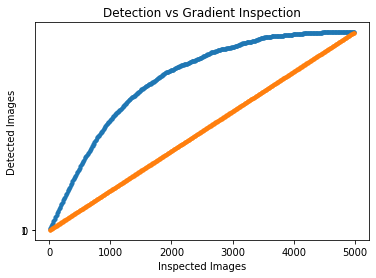

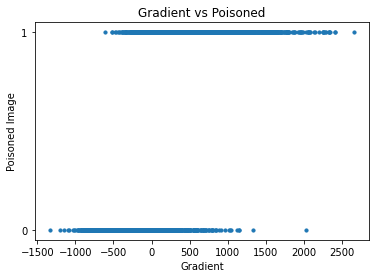

Number of poisoned images:  1499  out of 10000.
last index of poison 4675


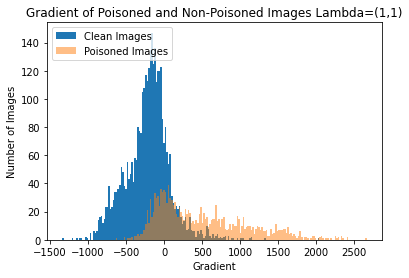

In [9]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

In [10]:
calibrated_gradient

[2663.899,
 2418.3823,
 2408.9248,
 2350.5876,
 2338.0808,
 2329.4268,
 2326.6265,
 2297.5244,
 2287.1013,
 2263.9346,
 2258.9753,
 2253.043,
 2252.0122,
 2201.0159,
 2147.6462,
 2133.2493,
 2081.9287,
 2079.318,
 2073.779,
 2061.6963,
 2053.6355,
 2051.4255,
 2036.6858,
 2031.4175,
 1995.8184,
 1971.8591,
 1971.0344,
 1963.4426,
 1947.4111,
 1947.0498,
 1945.0283,
 1925.0142,
 1884.5908,
 1874.2131,
 1867.8916,
 1858.4092,
 1850.8071,
 1813.2207,
 1803.3213,
 1799.1411,
 1789.0459,
 1788.5667,
 1784.4619,
 1783.9531,
 1781.6553,
 1767.4937,
 1763.6116,
 1762.5593,
 1750.5083,
 1738.9062,
 1736.5793,
 1727.5774,
 1714.363,
 1705.2625,
 1704.6936,
 1701.2852,
 1697.2239,
 1694.096,
 1687.8237,
 1676.8035,
 1669.9917,
 1666.7358,
 1662.8354,
 1661.73,
 1652.4321,
 1650.4236,
 1646.2275,
 1641.9666,
 1638.2361,
 1631.4382,
 1624.0493,
 1622.6262,
 1622.4265,
 1622.2219,
 1621.0908,
 1619.897,
 1619.4084,
 1615.0515,
 1612.9219,
 1610.9905,
 1609.1643,
 1608.0625,
 1597.667,
 1595.4299,
 1